Problem 0 - Import the data and declare your package dependencies.

In [ ]:
#Dependencies
import pandas as pd
import numpy as np
from plotnine import *

In [3]:
avocados = pd.read_csv('avocado-updated-2020.csv.zip')
print(avocados)

             date  average_price  total_volume        4046  ...  xlarge_bags          type  year             geography
0      2015-01-04           1.22      40873.28     2819.50  ...         0.00  conventional  2015                Albany
1      2015-01-04           1.79       1373.95       57.42  ...         0.00       organic  2015                Albany
2      2015-01-04           1.00     435021.49   364302.39  ...         0.00  conventional  2015               Atlanta
3      2015-01-04           1.76       3846.69     1500.15  ...         0.00       organic  2015               Atlanta
4      2015-01-04           1.08     788025.06    53987.31  ...         0.00  conventional  2015  Baltimore/Washington
...           ...            ...           ...         ...  ...          ...           ...   ...                   ...
33040  2020-11-29           1.47    1583056.27    67544.48  ...     27974.75       organic  2020            Total U.S.
33041  2020-11-29           0.91    5811114.22  

Problem 1 - Briefly describe the data set. What information does it contain?

The avocado dataset from Kaggle contains detailed information on avocado prices and sales volume in different parts of the United States from January 4th 2015 to May 17th 2020. This data set includes columns such as the date, average price, total sales of small, large, and extra-large avocadoes, total number of avocado bags sold, the type of avocado, where in the US the data was collected, and the year the data was collected. 

Problem 2 - Clean the data in any way you see fit.

In [6]:
#Used ChatGPT to help create a new column for region type

# Create a new column for region type (Major Region, State, Metro Area)
def categorize_region(geography):
    if geography in ['Total U.S.', 'West', 'Northeast', 'South', 'Midwest']:
        return 'Major Region'
    elif geography in ['California', 'Texas', 'Florida', 'New York']:
        return 'State'
    else:
        return 'Metro Area'

avocados['region_type'] = avocados['geography'].apply(categorize_region)



In [7]:
print(avocados)

             date  average_price  total_volume        4046  ...          type  year             geography   region_type
0      2015-01-04           1.22      40873.28     2819.50  ...  conventional  2015                Albany    Metro Area
1      2015-01-04           1.79       1373.95       57.42  ...       organic  2015                Albany    Metro Area
2      2015-01-04           1.00     435021.49   364302.39  ...  conventional  2015               Atlanta    Metro Area
3      2015-01-04           1.76       3846.69     1500.15  ...       organic  2015               Atlanta    Metro Area
4      2015-01-04           1.08     788025.06    53987.31  ...  conventional  2015  Baltimore/Washington    Metro Area
...           ...            ...           ...         ...  ...           ...   ...                   ...           ...
33040  2020-11-29           1.47    1583056.27    67544.48  ...       organic  2020            Total U.S.  Major Region
33041  2020-11-29           0.91    5811

In [12]:
# Renaming columns for clarity
clean_df = avocados.rename(columns={
    '4046': 'small_avocados',
    '4225': 'large_avocados',
    '4770': 'xl_avocados',
    'Total Volume': 'total_avocado_volume',
    'Total Bags': 'total_bags',
    'geography': 'region'
})


In [13]:
print(clean_df)

             date  average_price  total_volume  small_avocados  ...          type  year                region   region_type
0      2015-01-04           1.22      40873.28         2819.50  ...  conventional  2015                Albany    Metro Area
1      2015-01-04           1.79       1373.95           57.42  ...       organic  2015                Albany    Metro Area
2      2015-01-04           1.00     435021.49       364302.39  ...  conventional  2015               Atlanta    Metro Area
3      2015-01-04           1.76       3846.69         1500.15  ...       organic  2015               Atlanta    Metro Area
4      2015-01-04           1.08     788025.06        53987.31  ...  conventional  2015  Baltimore/Washington    Metro Area
...           ...            ...           ...             ...  ...           ...   ...                   ...           ...
33040  2020-11-29           1.47    1583056.27        67544.48  ...       organic  2020            Total U.S.  Major Region
33041  2

Problem 3 - Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [14]:
#Used ChatGPT to help me filter the dataframe and calculate total small avocado sales by region. 
# Filter the DataFrame for the year 2017 and organic avocados
df_2017_organic = clean_df[(clean_df['year'] == 2017) & (clean_df['type'] == 'organic')]

# Filter to only include rows where the region is a 'Major Region'
major_regions = ['Total U.S.', 'West', 'Northeast', 'South', 'Midwest']
df_major_regions = df_2017_organic[df_2017_organic['region'].isin(major_regions)]

# Group by region and calculate the total small avocado sales
total_small_avocados_by_region = df_major_regions.groupby('region')['small_avocados'].sum()


In [15]:
print(total_small_avocados_by_region)

region
Northeast      925832.36
Total U.S.    6882024.42
West          1870206.29
Name: small_avocados, dtype: float64
region
Northeast      925832.36
Total U.S.    6882024.42
West          1870206.29
Name: small_avocados, dtype: float64


Total U.S. is the major geographical region that sold the most small avocados in 2017 with a total of 6882024.42 small avocados sold. 

Problem 4 - Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [18]:
#Use ChatGPT to convert the date column into three seperate columns for year, month, and day
clean_df['date'] = pd.to_datetime(clean_df['date'], format='%Y-%m-%d')

clean_df['year'] = clean_df['date'].dt.year
clean_df['month'] = clean_df['date'].dt.month
clean_df['day'] = clean_df['date'].dt.day

clean_df

,date,average_price,total_volume,small_avocados,large_avocados,xl_avocados,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,region_type,month,day
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,Metro Area,1,4
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,Metro Area,1,4
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,Metro Area,1,4
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,Metro Area,1,4
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,Metro Area,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,Major Region,11,29
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,Major Region,11,29
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West,Major Region,11,29
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,Metro Area,11,29


In [25]:
#Convert values from scientific notation to standard decimal notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [26]:
# Filter the DataFrame for the year 2017 and organic avocados
average_volume_by_month = clean_df.groupby('month')['total_volume'].mean()
max_month = average_volume_by_month.idxmax()
print(average_volume_by_month)
print(max_month)

month
1     985312.16
2    1095373.83
3     995715.04
4    1016581.69
5    1123632.25
6    1051246.57
7     983268.10
8     949924.93
9     906477.26
10    844686.29
11    822347.02
12    807669.47
Name: total_volume, dtype: float64
5
month
1     985312.16
2    1095373.83
3     995715.04
4    1016581.69
5    1123632.25
6    1051246.57
7     983268.10
8     949924.93
9     906477.26
10    844686.29
11    822347.02
12    807669.47
Name: total_volume, dtype: float64
5


May (month #5) was the month with the highest average volume of avocado sales at 1123632.25

Problem 5 - Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [30]:
metro_area = clean_df[clean_df['region_type'] == 'Metro Area']

volume_by_metro_region = metro_area.groupby('region')['total_volume'].sum()

top_five_metro_areas = volume_by_metro_region.nlargest(5).index

top_five_data = metro_area[metro_area['region'].isin(top_five_metro_areas)]

print(top_five_metro_areas)




Index(['South Central', 'Southeast', 'Great Lakes', 'Midsouth', 'Los Angeles'], dtype='object', name='region')
Index(['South Central', 'Southeast', 'Great Lakes', 'Midsouth', 'Los Angeles'], dtype='object', name='region')


The South Central region is the region that sold the most amount of total avocados. 

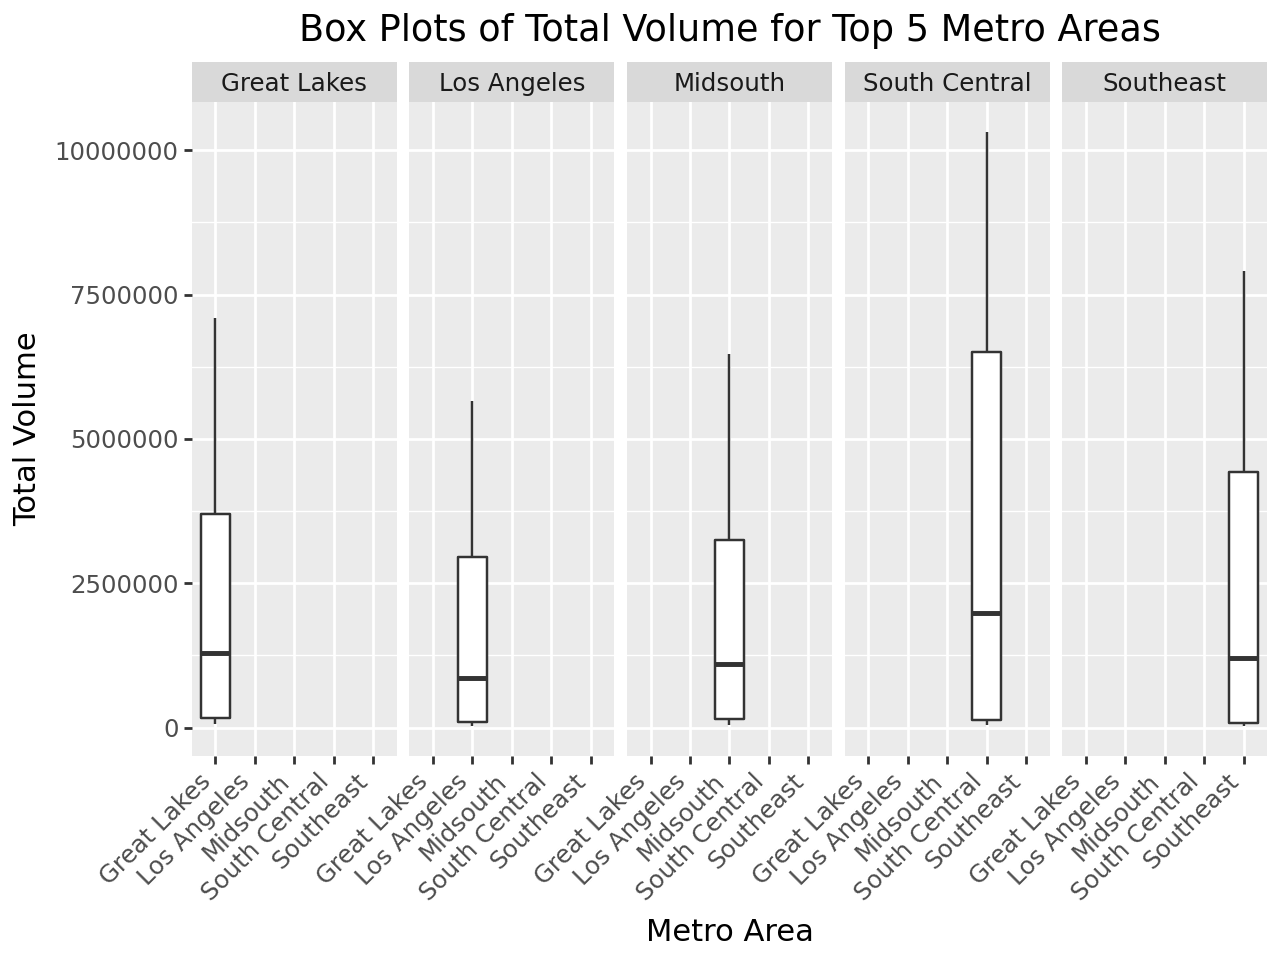

In [37]:
#HELP WHY ARE ALL MY BOX PLOTS MESSED UP
#Using plotnine to create side by side box plots

(ggplot(top_five_data,
aes(
  x = "region",
  y = "total_volume"
))
+ geom_boxplot()
 + labs(title='Box Plots of Total Volume for Top 5 Metro Areas', x='Metro Area', y='Total Volume')
+ facet_wrap('region', ncol=5)
+ theme(axis_text_x=element_text(rotation=45, hjust=1))

)

Problem 6 - From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

         date  average_price  total_volume  small_avocados  large_avocados  ...  year       region  region_type  month  day
44 2015-01-04           0.85    2682159.95      1837999.65       524430.47  ...  2015  Los Angeles   Metro Area      1    4
45 2015-01-04           1.25      54495.54        47721.51         1723.40  ...  2015  Los Angeles   Metro Area      1    4
80 2015-01-04           1.05     430138.88       110693.69       270107.61  ...  2015   Sacramento   Metro Area      1    4
81 2015-01-04           1.33       9213.49         3727.52         4327.52  ...  2015   Sacramento   Metro Area      1    4
82 2015-01-04           0.94     461607.33       244152.26       165299.33  ...  2015    San Diego   Metro Area      1    4

[5 rows x 16 columns]
         date  average_price  total_volume  small_avocados  large_avocados  ...  year       region  region_type  month  day
44 2015-01-04           0.85    2682159.95      1837999.65       524430.47  ...  2015  Los Angeles   Metro Ar

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


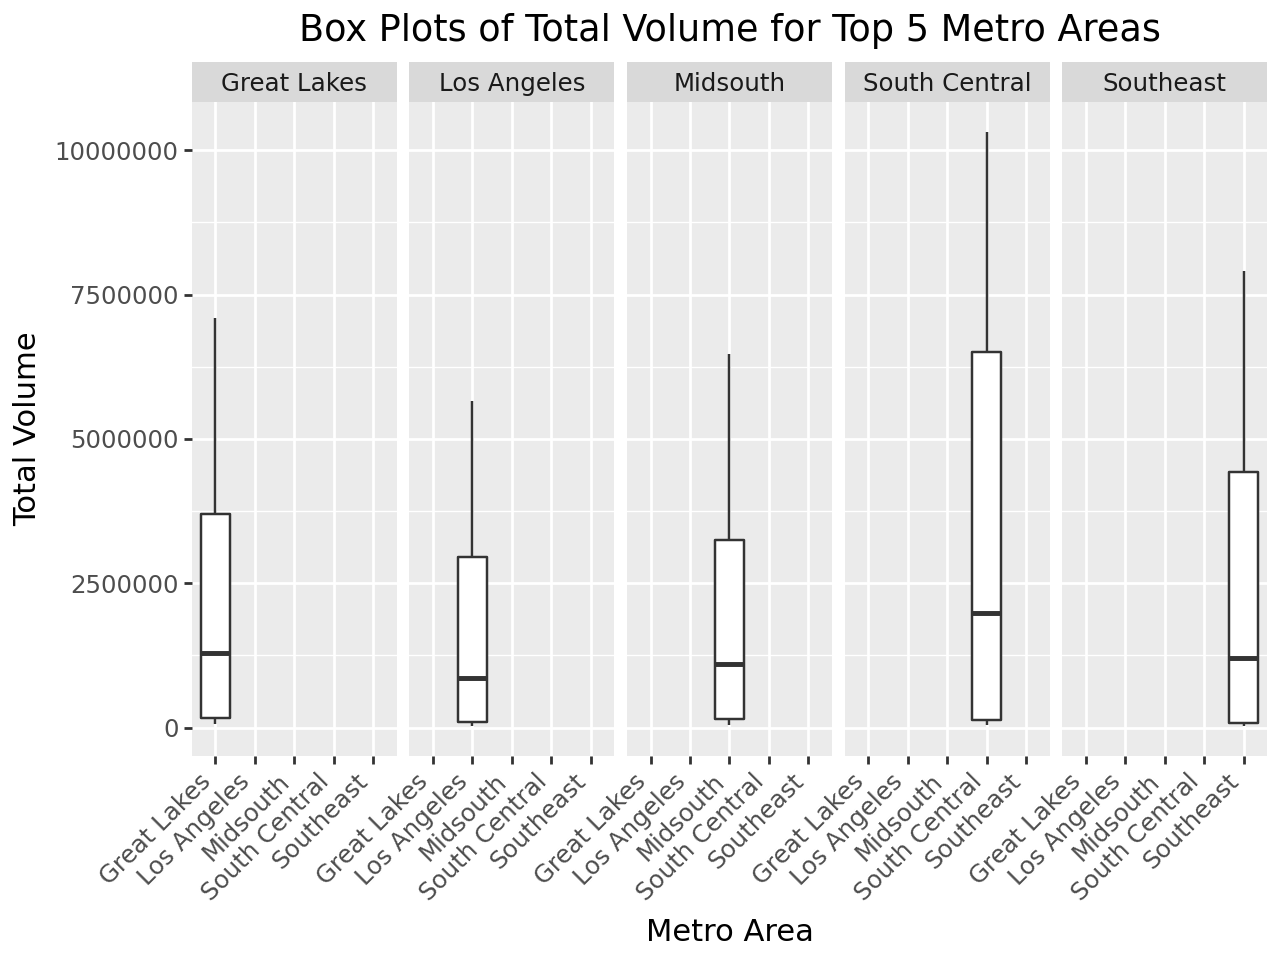

In [39]:
# Define the California regions
california_regions = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']

# Filter the cleaned DataFrame to include only rows from these California regions
california_df = clean_df[clean_df['region'].isin(california_regions)]

# Display the first few rows of the California data to verify the filter worked
print(california_df.head())

Problem 7 - In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

type           conventional  organic
region                              
Los Angeles            1.05     1.57
Sacramento             1.30     1.87
San Diego              1.11     1.80
San Francisco          1.40     2.12
type           conventional  organic
region                              
Los Angeles            1.05     1.57
Sacramento             1.30     1.87
San Diego              1.11     1.80
San Francisco          1.40     2.12


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


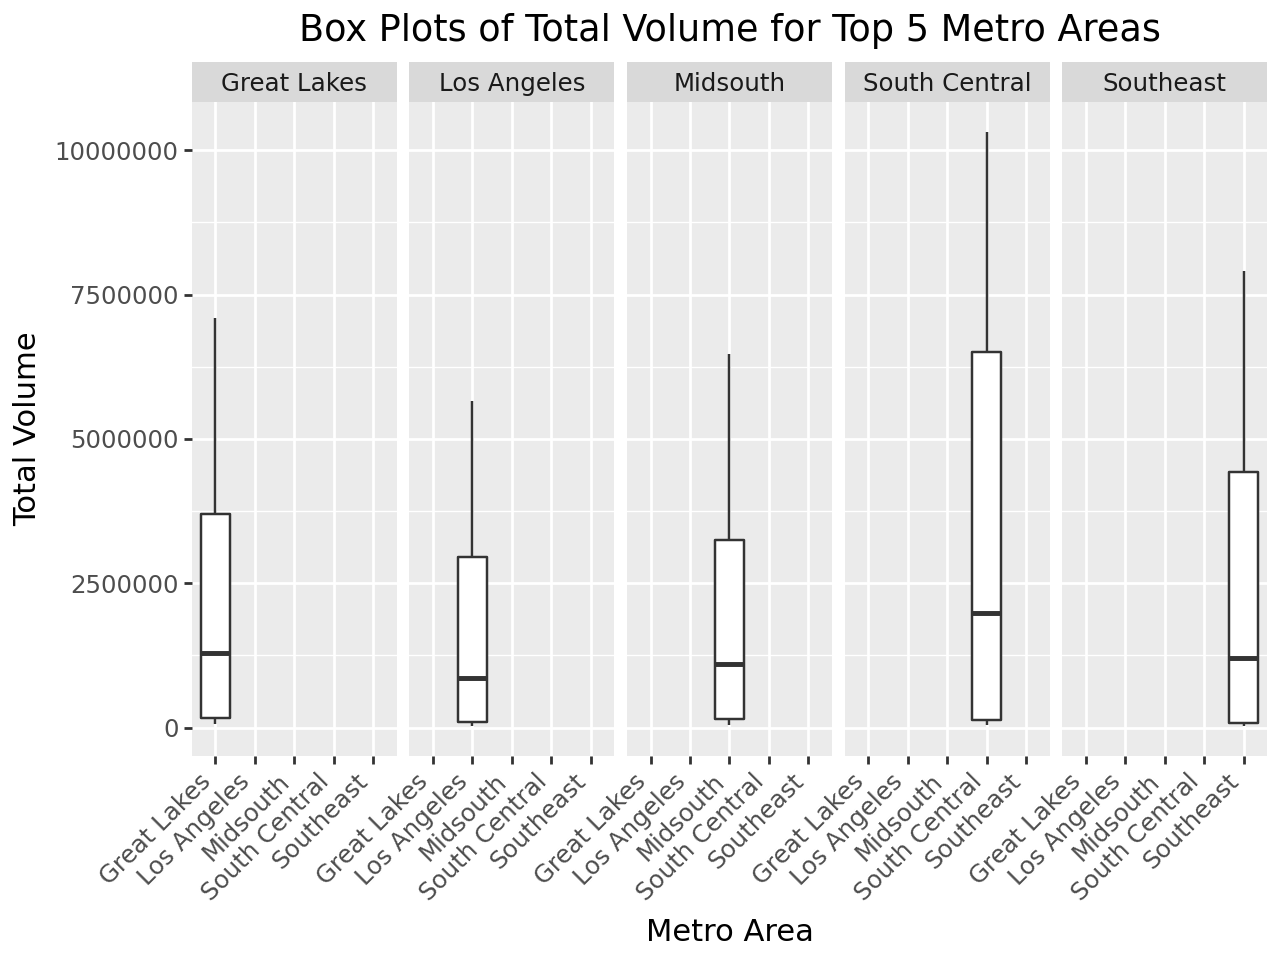

In [40]:
# Group the data by region and type, then calculate the mean price
average_price_by_type = california_df.groupby(['region', 'type'])['average_price'].mean().unstack()

# Display the result to check
print(average_price_by_type)

type           conventional  organic  price_difference
region                                                
Los Angeles            1.05     1.57              0.53
Sacramento             1.30     1.87              0.58
San Diego              1.11     1.80              0.68
San Francisco          1.40     2.12              0.72
type           conventional  organic  price_difference
region                                                
Los Angeles            1.05     1.57              0.53
Sacramento             1.30     1.87              0.58
San Diego              1.11     1.80              0.68
San Francisco          1.40     2.12              0.72


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


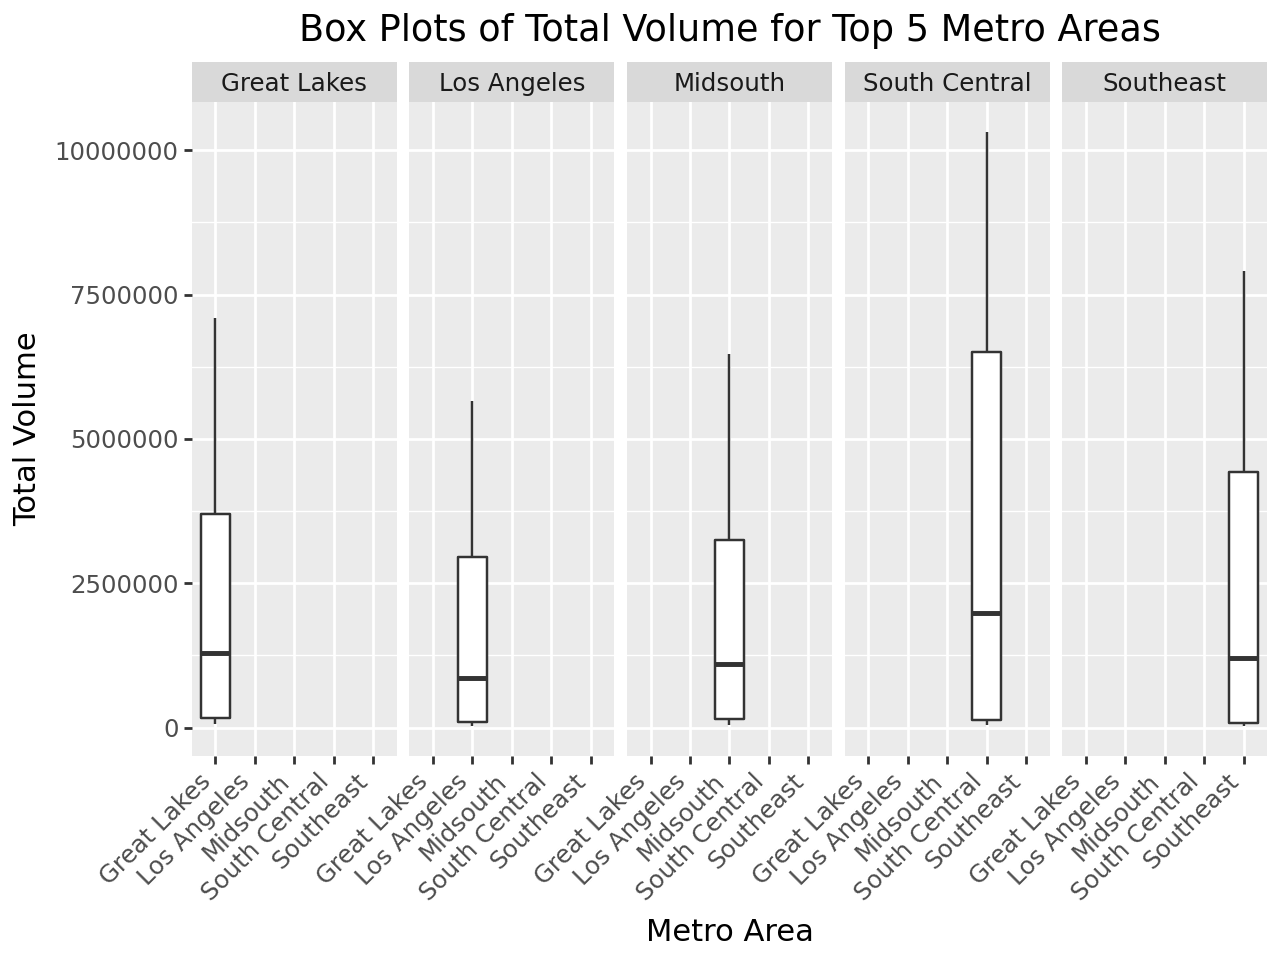

In [41]:
# Calculate the price difference between organic and conventional avocados
average_price_by_type['price_difference'] = average_price_by_type['organic'] - average_price_by_type['conventional']

# Display the result with the price differences
print(average_price_by_type)


The San Francisco region has the largest price difference between organic and conventional avocados. 

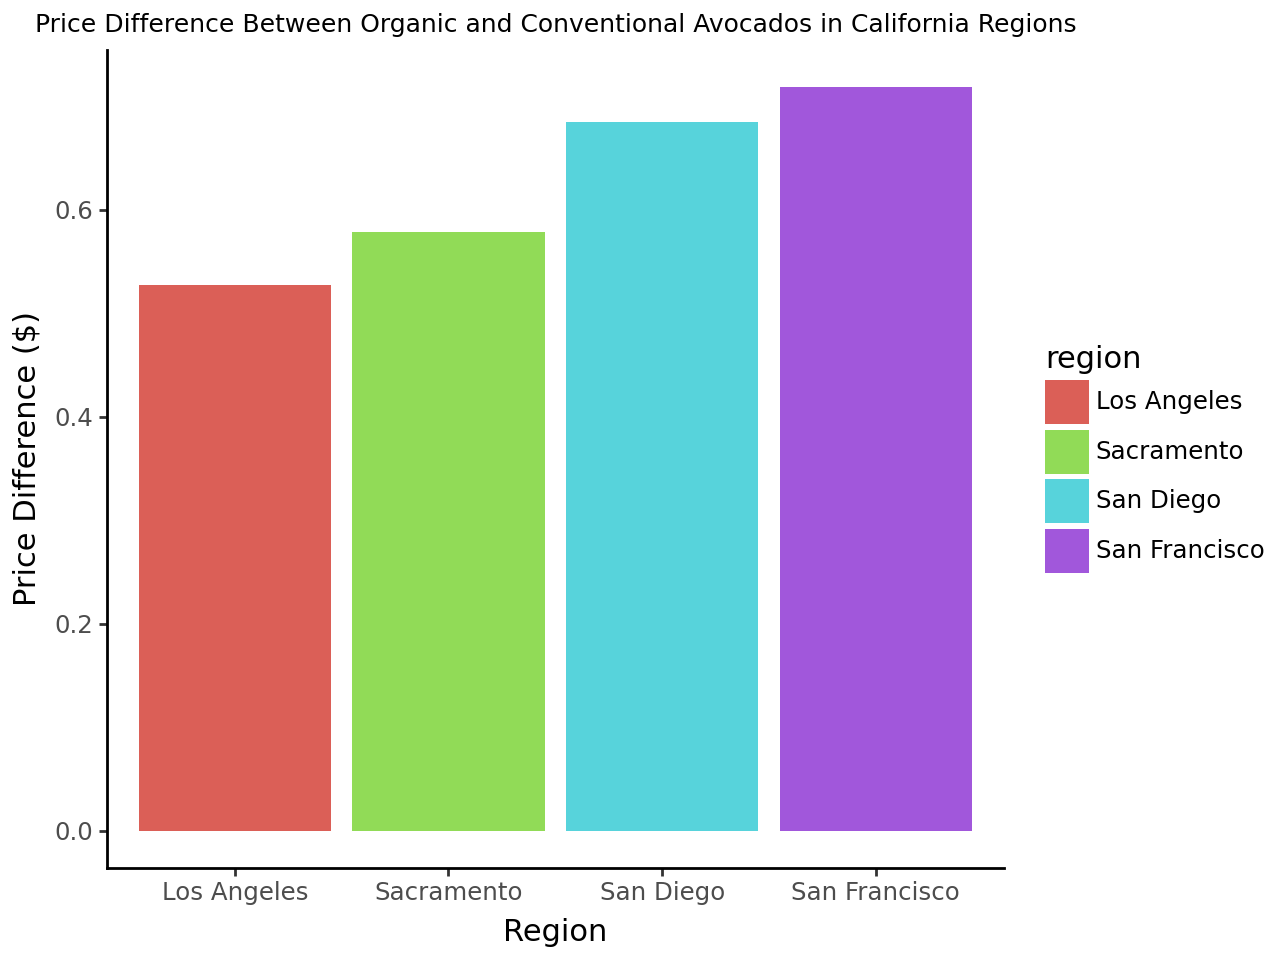

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


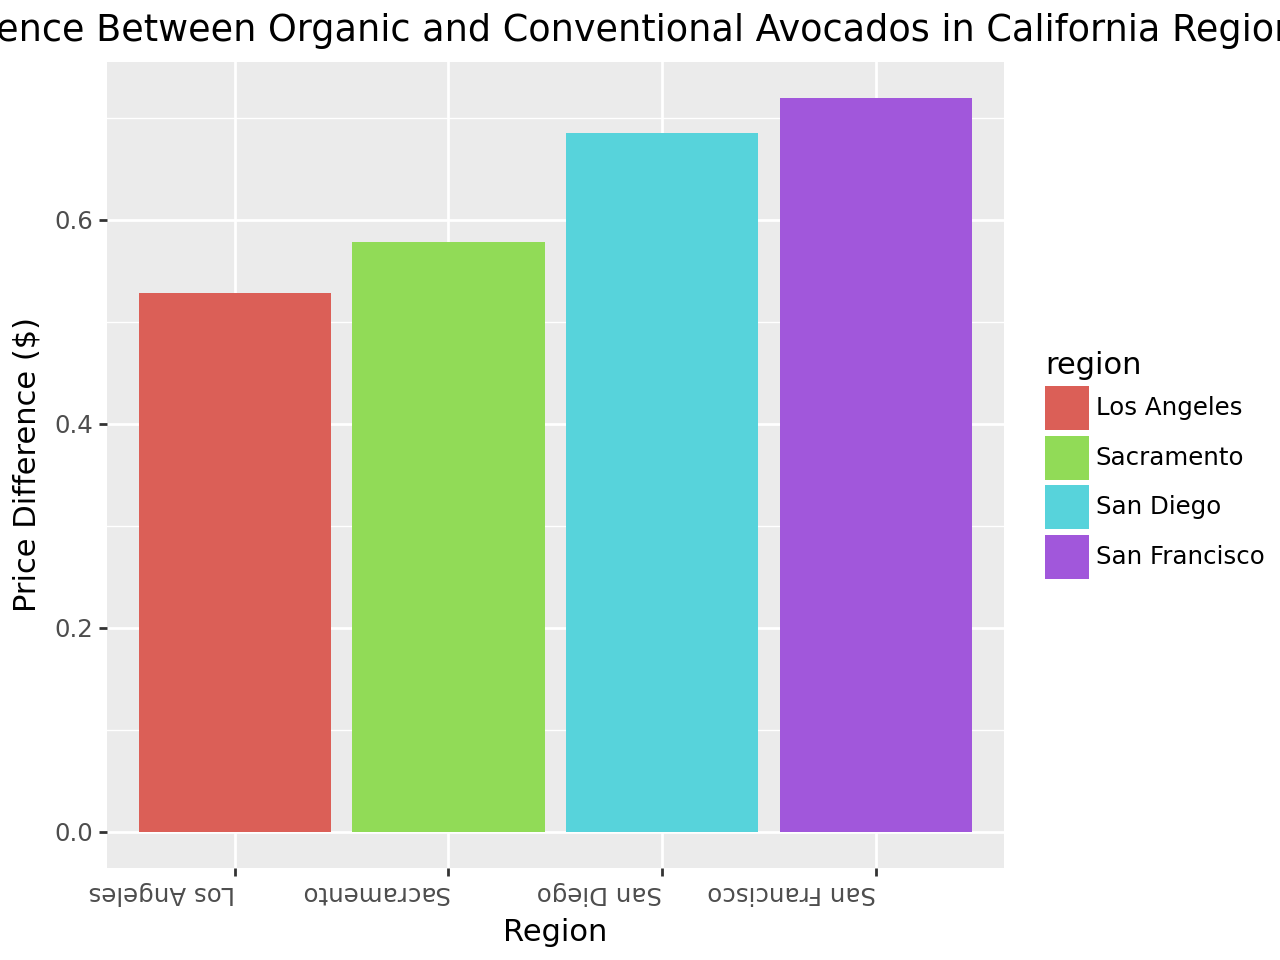

In [68]:
(
    ggplot(average_price_by_type, aes(x='region', y='price_difference', fill='region'))
    + geom_bar(stat='identity') 
    + labs(title='Price Difference Between Organic and Conventional Avocados in California Regions',
           x='Region',
           y='Price Difference ($)')
    + theme_classic()
    + theme(plot_title=element_text(size=9))
)

Problem 8 - Recreate the plot, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. 

        region          type    size  avocado_volume  proportion
0  Los Angeles  conventional   Large    135815746.42        0.26
1  Los Angeles  conventional   Small    358923415.42        0.68
2  Los Angeles  conventional  Xlarge     29704534.92        0.06
3  Los Angeles       organic   Large      6366091.52        0.59
4  Los Angeles       organic   Small      4419271.78        0.41
        region          type    size  avocado_volume  proportion
0  Los Angeles  conventional   Large    135815746.42        0.26
1  Los Angeles  conventional   Small    358923415.42        0.68
2  Los Angeles  conventional  Xlarge     29704534.92        0.06
3  Los Angeles       organic   Large      6366091.52        0.59
4  Los Angeles       organic   Small      4419271.78        0.41


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


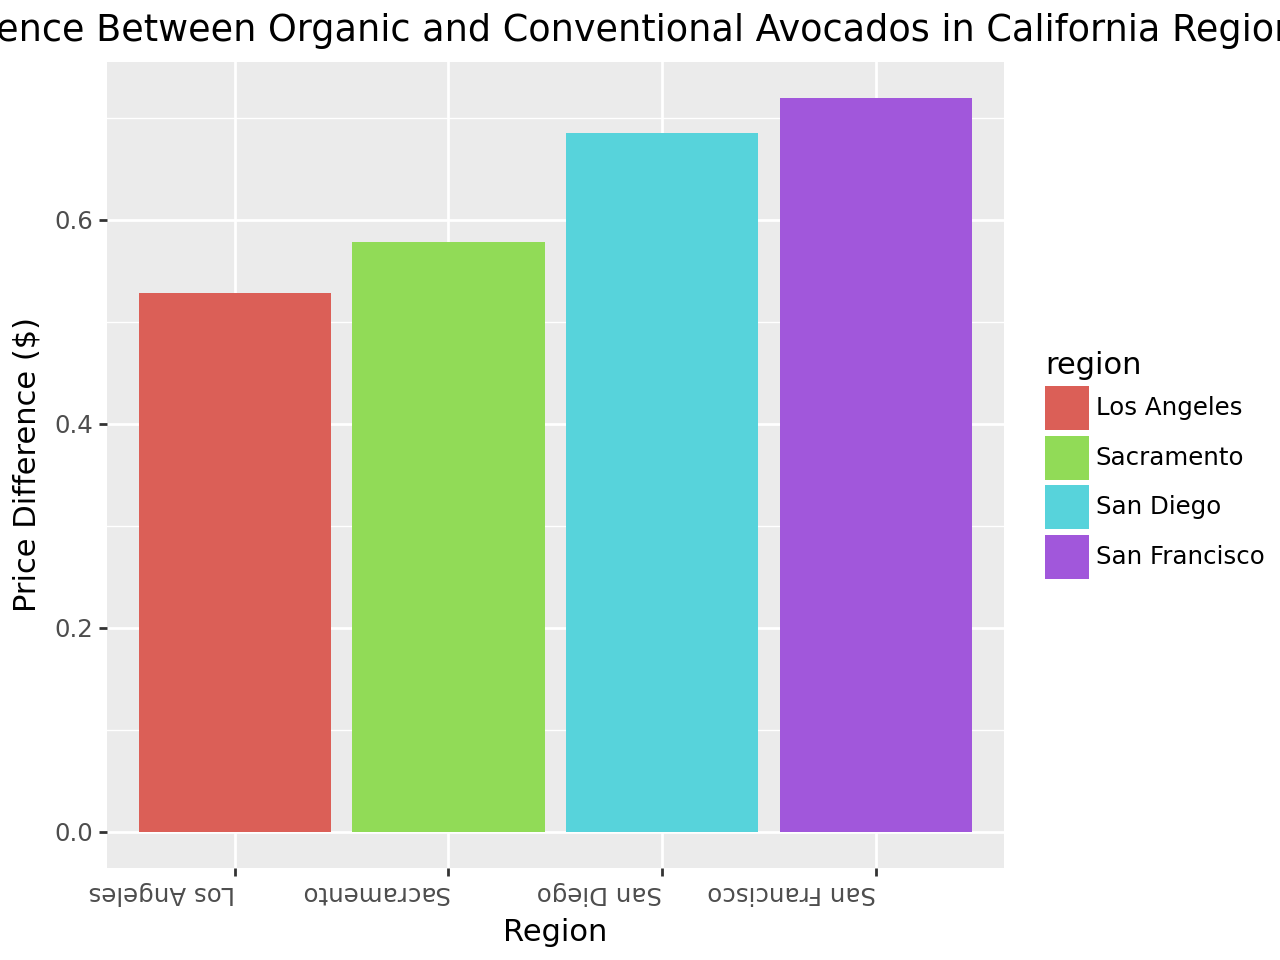

In [81]:


# Melt the data so 'small_avocados', 'large_avocados', and 'xl_avocados' become a single 'size' column
melted_data = pd.melt(
    california_df,
    id_vars=['region', 'type'],  # Keep region and type columns as is
    value_vars=['small_avocados', 'large_avocados', 'xl_avocados'],  # Columns to melt
    var_name='size',  # New column that will indicate the size category
    value_name='avocado_volume'  # Avoid naming conflict by choosing a different value name
)

# Rename 'small_avocados', 'large_avocados', and 'xl_avocados' to 'Small', 'Large', 'Xlarge'
melted_data['size'] = melted_data['size'].replace({
    'small_avocados': 'Small',
    'large_avocados': 'Large',
    'xl_avocados': 'Xlarge'
})

# Group by region, type (organic/conventional), and size (Small, Large, Xlarge) and calculate the sum of avocado_volume
grouped_data = melted_data.groupby(['region', 'type', 'size'])['avocado_volume'].sum().reset_index()

# Create a dataframe with total volumes for each 'region' and 'type' (conventional/organic)
total_volumes = grouped_data.groupby(['region', 'type'])['avocado_volume'].sum().reset_index()

# Rename the column to avoid confusion
total_volumes.rename(columns={'avocado_volume': 'total_volume_by_region_type'}, inplace=True)

# Merge the total volumes back to the original grouped data to calculate proportions
grouped_data = pd.merge(grouped_data, total_volumes, on=['region', 'type'])

# Calculate the proportion of each size category within each region and type
grouped_data['proportion'] = grouped_data['avocado_volume'] / grouped_data['total_volume_by_region_type']

# Drop the extra column for cleaner output if not needed
grouped_data.drop(columns='total_volume_by_region_type', inplace=True)

# Display the transformed dataset
print(grouped_data.head())

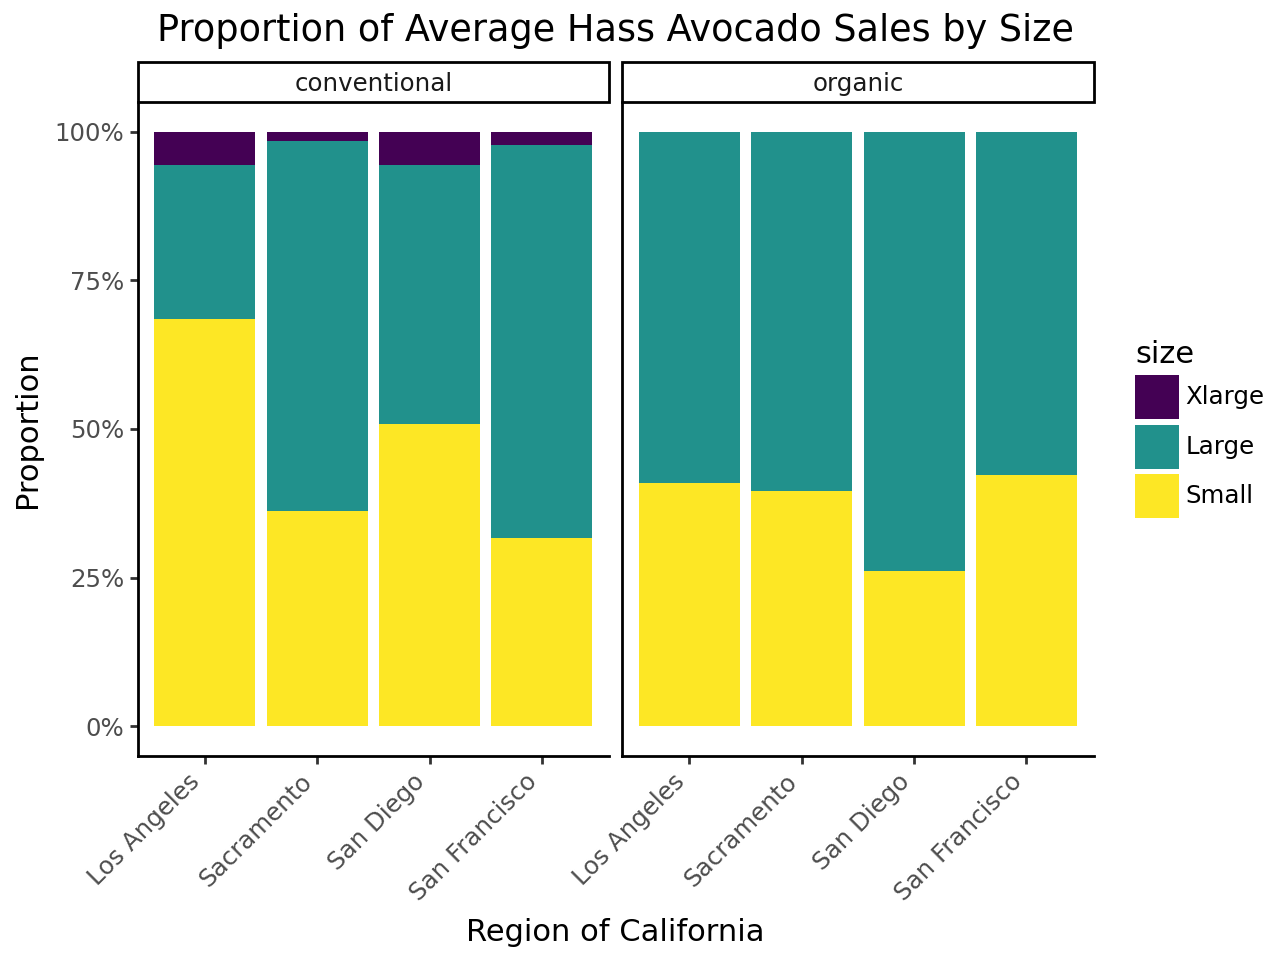

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


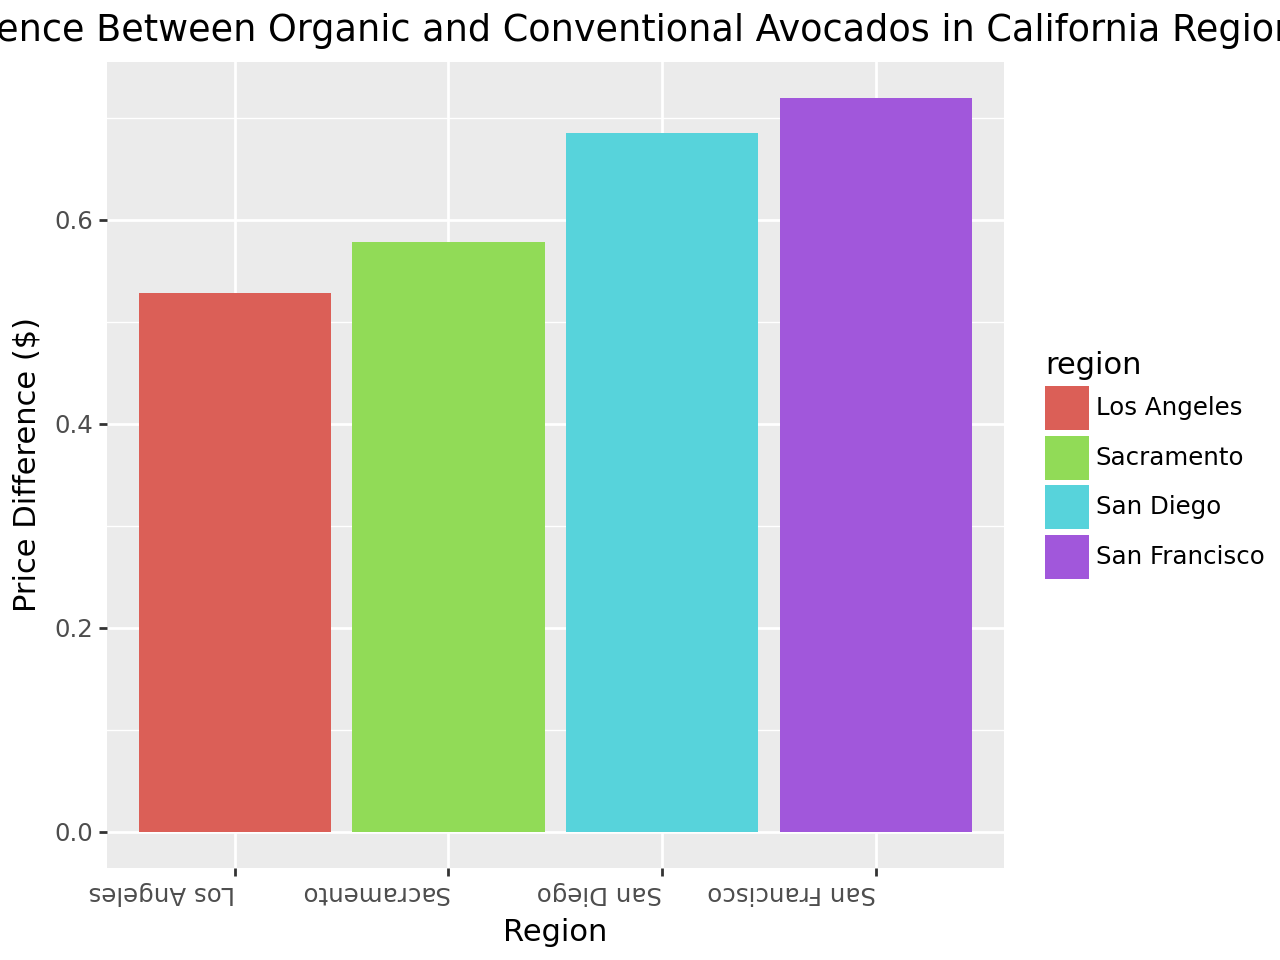

In [82]:
# Set the order of the 'size' column to Xlarge, Large, Small
size_order = ['Xlarge', 'Large', 'Small']
grouped_data['size'] = pd.Categorical(grouped_data['size'], categories=size_order, ordered=True)

# Define a custom function to format the y-axis as percentages
def percent_formatter(values):
    return [f'{v*100:.0f}%' for v in values]

# Create the plot
(
    ggplot(grouped_data, aes(x='region', y='proportion', fill='size'))
    + geom_bar(stat='identity', position='stack')  # Create stacked bars for each size category
    + facet_wrap('type')  # Facet by 'type' (conventional/organic)
    + labs(title='Proportion of Average Hass Avocado Sales by Size', x='Region of California', y='Proportion')
    + theme_classic()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))  # Rotate x-axis labels for readability
    + scale_y_continuous(labels=percent_formatter)  # Use the custom function to format y-axis as percentages
)

USING OUTSIDE DATA PROBLEM

According to Zillow, the following California regions have the following average house prices...

Los Angeles: $941,784 (https://www.zillow.com/home-values/12447/los-angeles-ca/)
Sacramento: $479,880 (https://www.zillow.com/home-values/20288/sacramento-ca/)
San Diego: $1,013,179 (https://www.zillow.com/home-values/54296/san-diego-ca/)
San Francisco: $1,258,701 (https://www.zillow.com/home-values/20330/san-francisco-ca/)


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


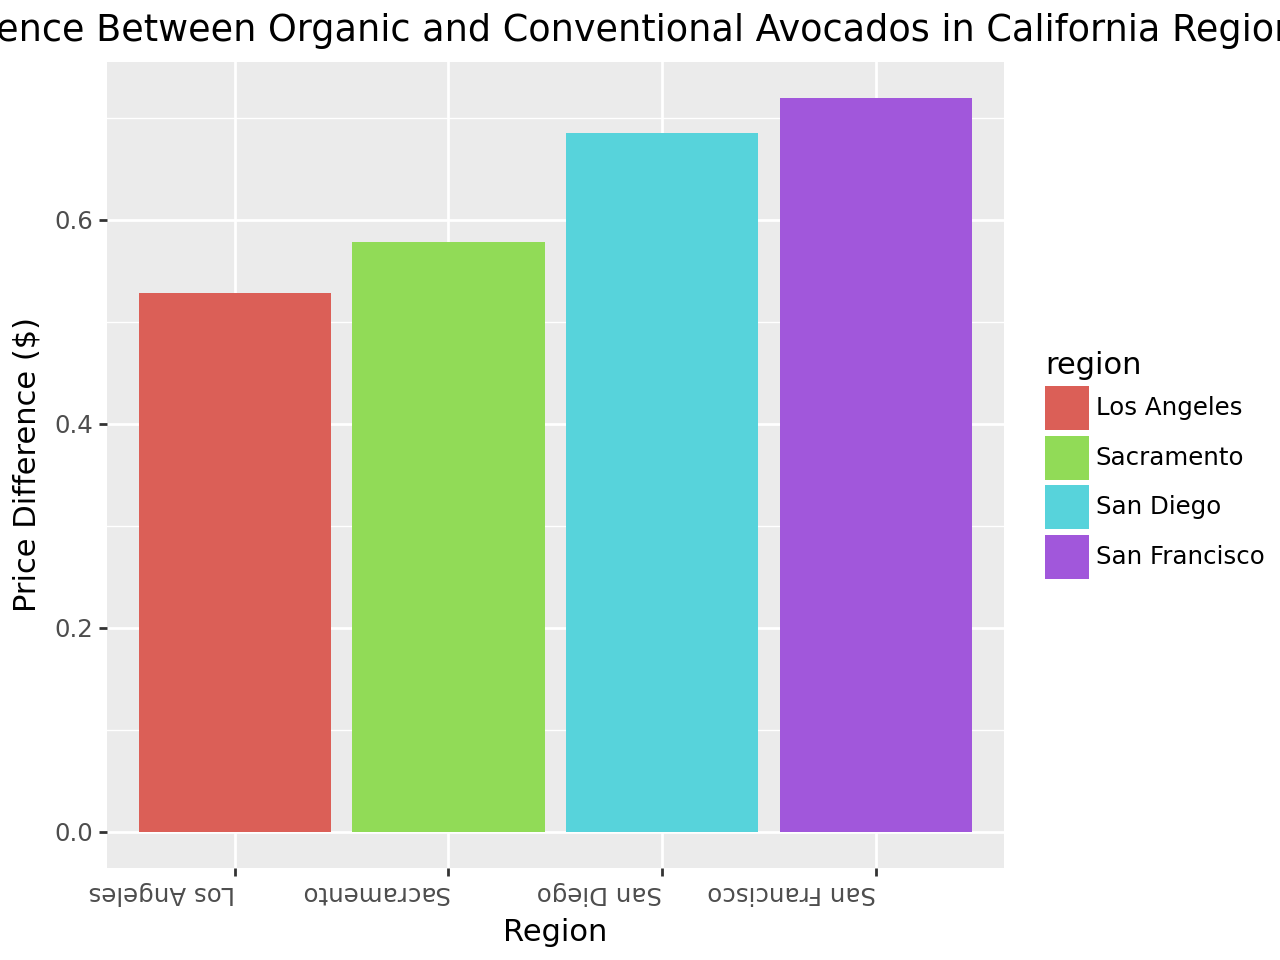

In [83]:
house_prices_df = pd.DataFrame({
    'region': ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco'],
    'avg_house_price': [941784, 479880, 1013179, 1258701] 
})

,date,average_price,total_volume,small_avocados,large_avocados,xl_avocados,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,region_type,month,day,avg_house_price
0,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,Metro Area,1,4,941784
1,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,Metro Area,1,4,941784
2,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,Metro Area,1,4,1013179
3,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,Metro Area,1,4,1013179
4,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,Metro Area,1,4,479880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,2020-11-29,1.43,23531.38,3303.69,2057.03,0.00,18170.66,18144.54,26.12,0.00,organic,2020,Sacramento,Metro Area,11,29,1013179
2444,2020-11-29,1.12,469356.72,104509.99,19988.45,7210.47,337647.81,189341.36,127701.64,20604.81,conventional,2020,San Diego,Metro Area,11,29,479880
2445,2020-11-29,1.95,25799.95,894.63,838.11,0.00,24067.21,9691.46,14375.75,0.00,organic,2020,San Diego,Metro Area,11,29,479880
2446,2020-11-29,1.50,644141.37,128555.43,136718.24,5597.21,373270.49,159276.65,207760.32,6233.52,conventional,2020,San Francisco,Metro Area,11,29,1258701


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


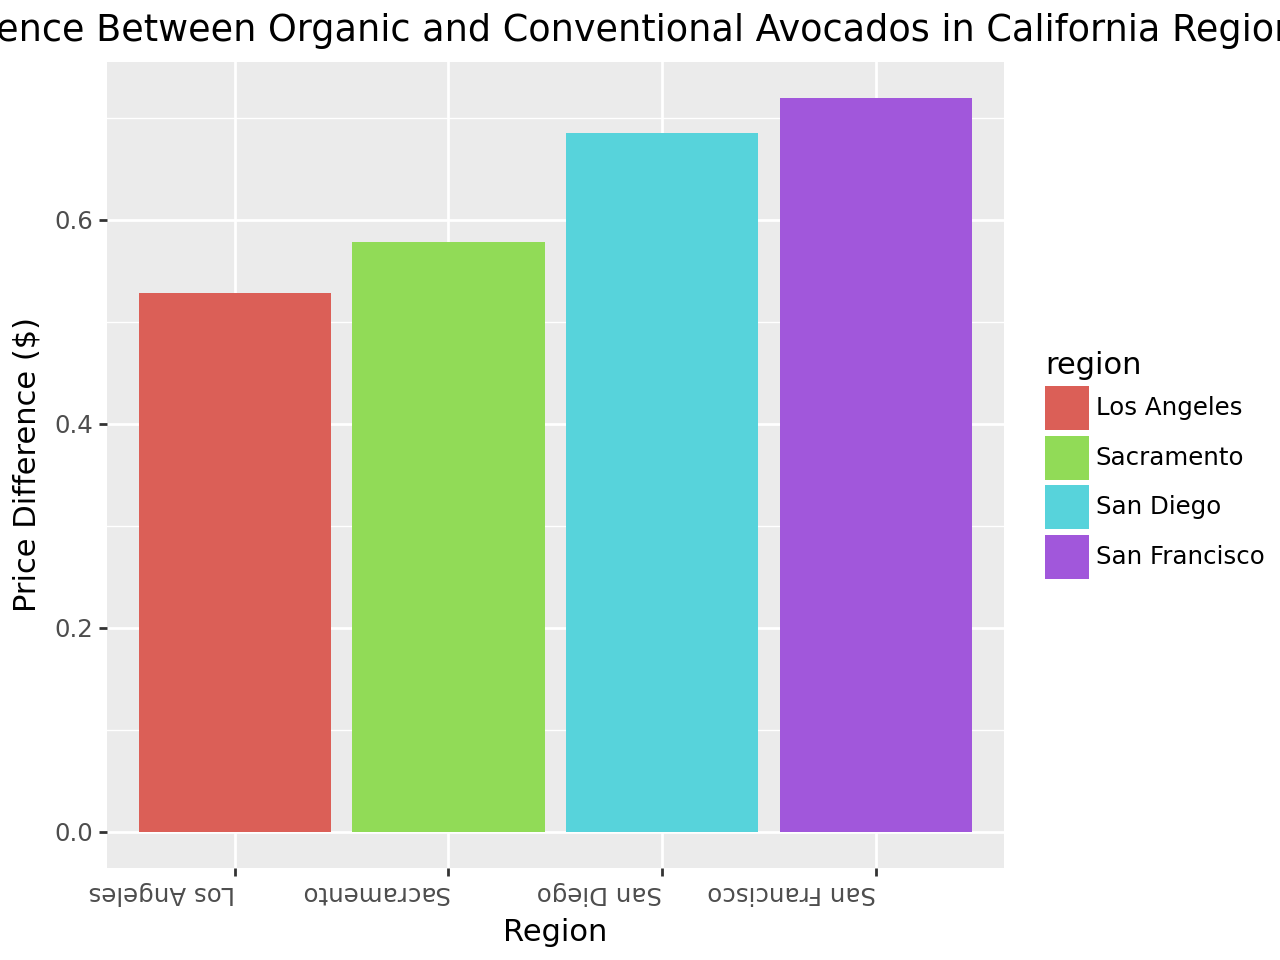

In [86]:
merged_data = pd.merge(california_df, house_prices_df, on='region')

merged_data

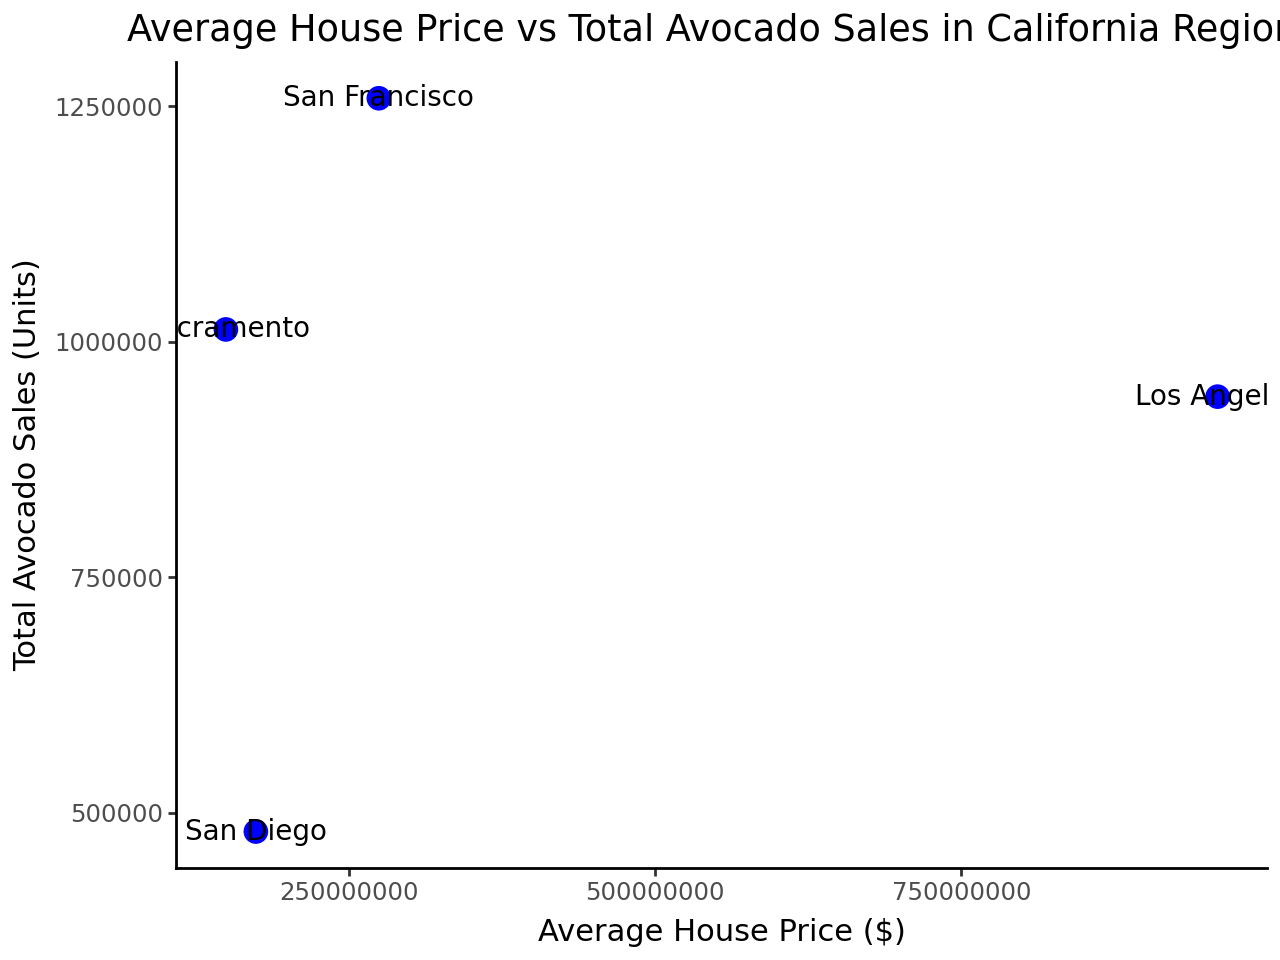

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


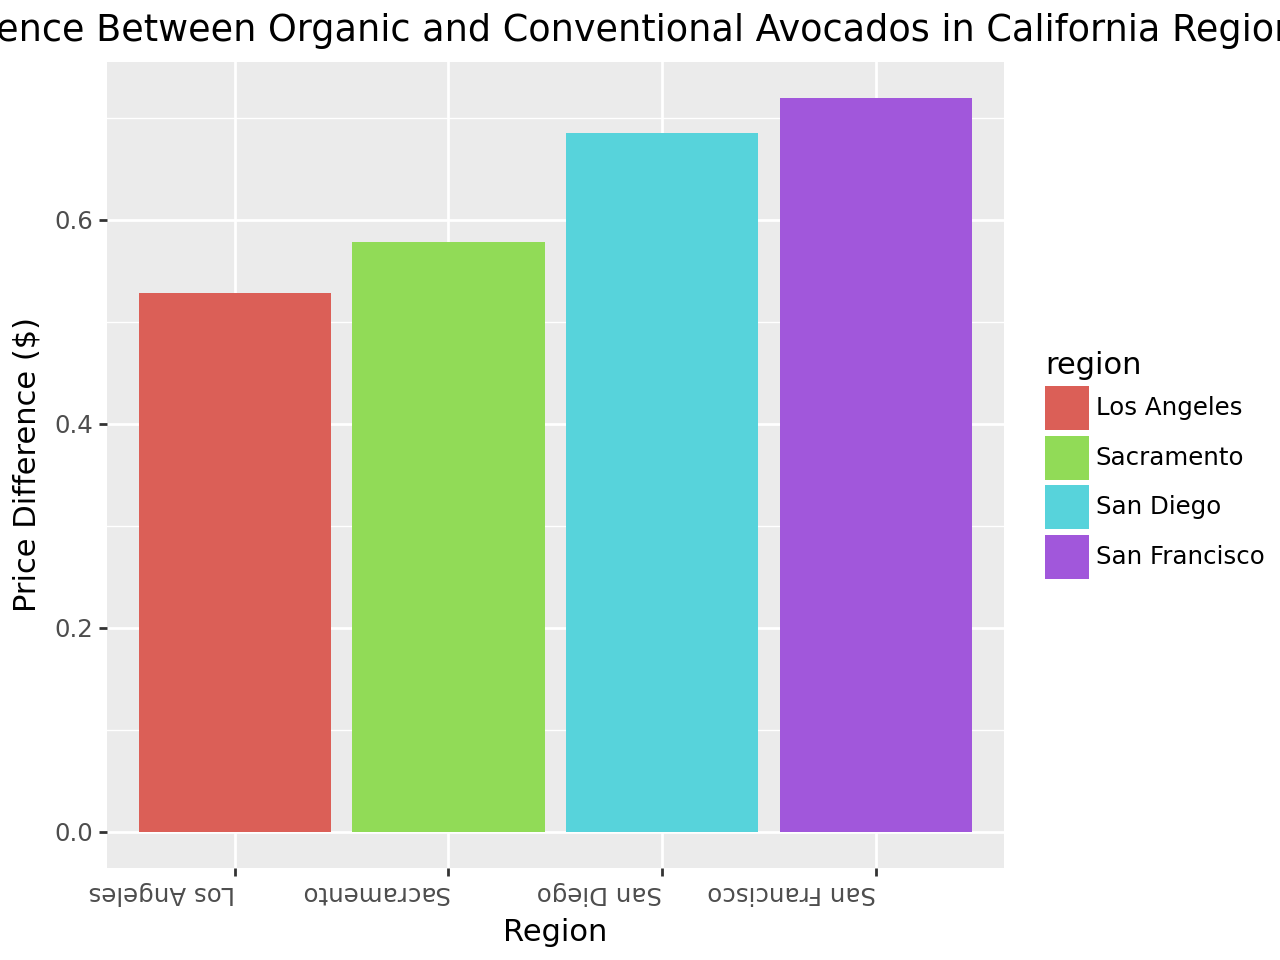

In [100]:
(
    ggplot(avocado_summary, aes(x='total_volume', y='avg_house_price'))
    + geom_point(color='blue', size=4)  # Create blue dots for each region
    + geom_text(aes(label='region'), nudge_y=0.1, size=10)  # Label each dot with region name
    + labs(
        title='Average House Price vs Total Avocado Sales in California Regions',
        x='Average House Price ($)',
        y='Total Avocado Sales (Units)'
    )
    + theme_classic()
)

,region,total_volume,average_price,avg_house_price
0,Los Angeles,959350488.02,1.31,941784.00
1,Sacramento,149271315.73,1.58,1013179.00
2,San Diego,173764449.74,1.46,479880.00
3,San Francisco,274216888.35,1.76,1258701.00


C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


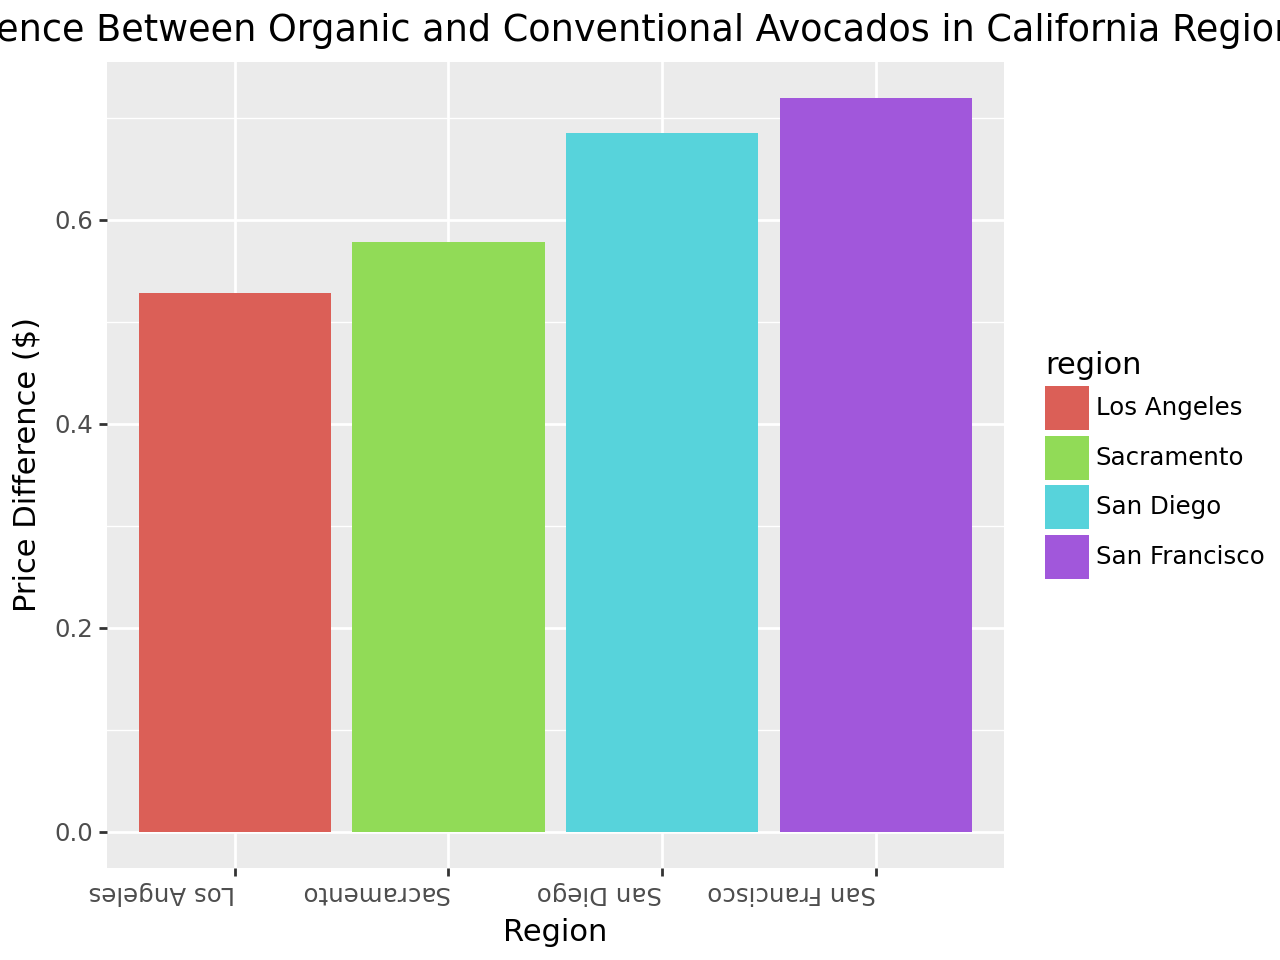

In [96]:
avocado_summary = merged_data.groupby(['region']).agg({
    'total_volume': 'sum',
    'average_price': 'mean',  # Assuming avg_price column exists
    'avg_house_price': 'mean'  # House price for each region (dummy)
}).reset_index()

# Display the summary data
avocado_summary

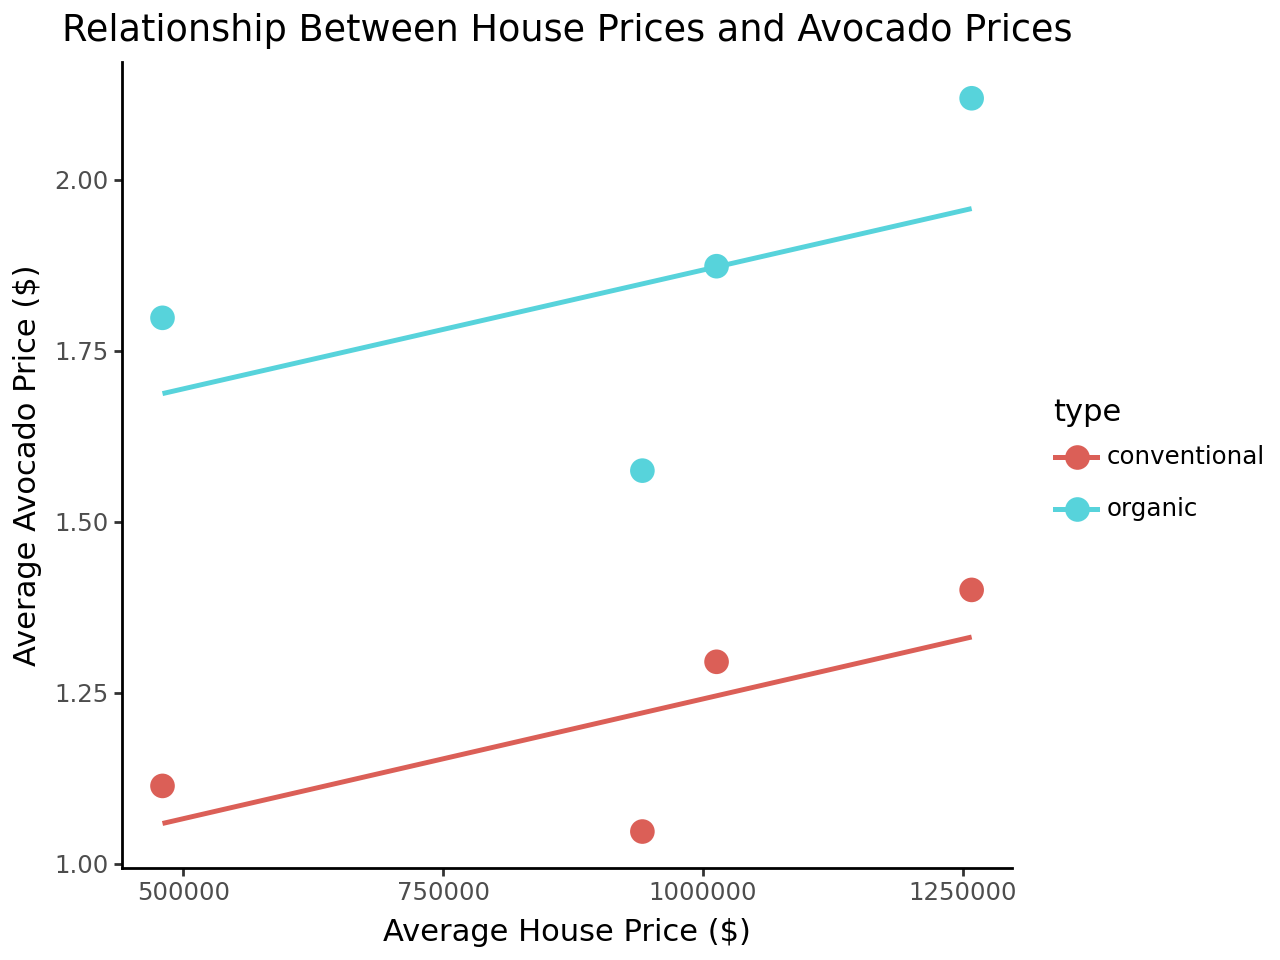

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


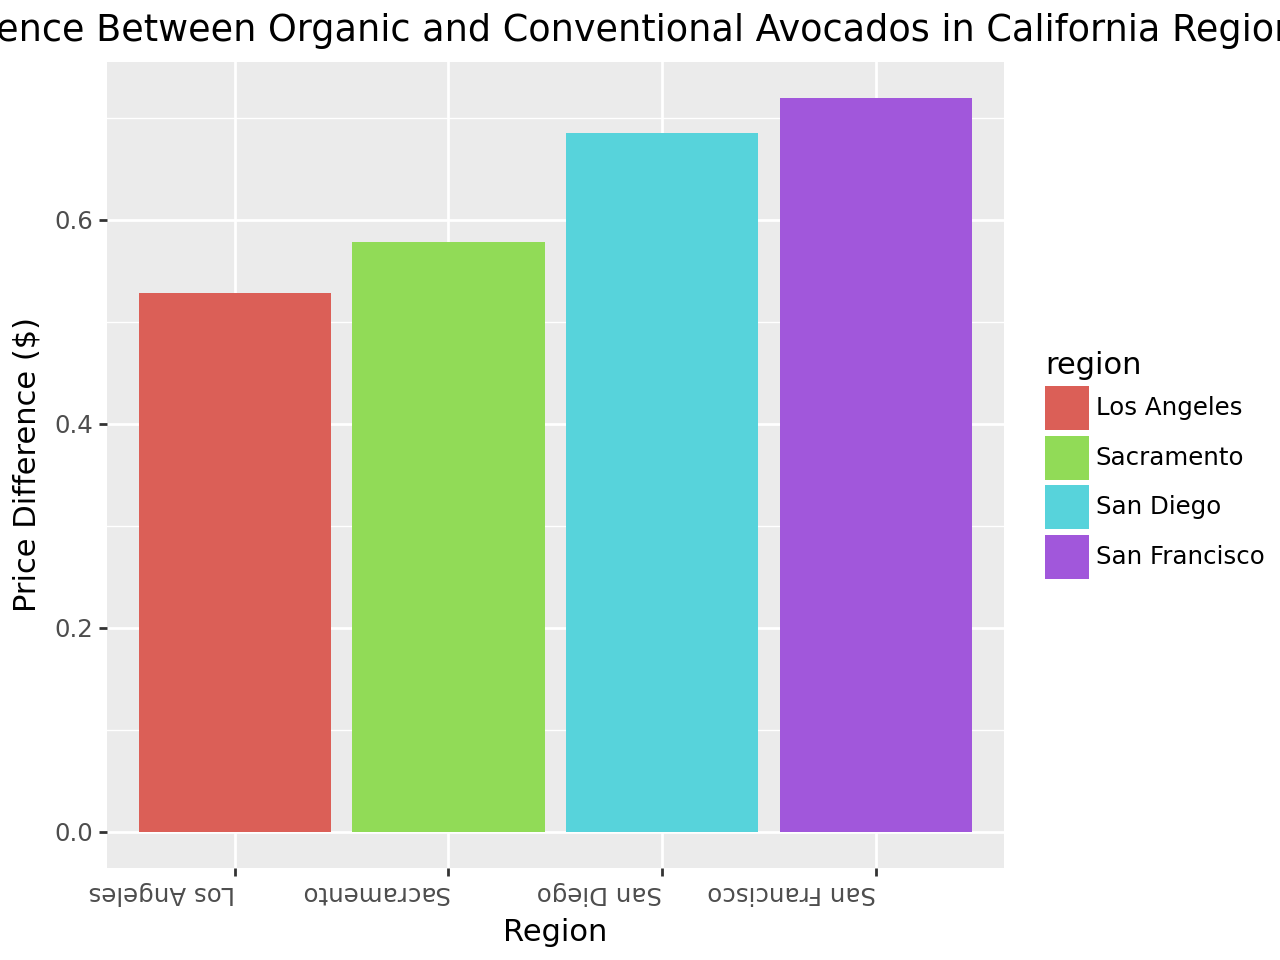

In [89]:
(
    ggplot(avocado_summary, aes(x='avg_house_price', y='average_price', color='type'))
    + geom_point(size=4)  # Scatter points
    + geom_smooth(method='lm', se=False)  # Linear trend line
    + labs(title='Relationship Between House Prices and Avocado Prices',
           x='Average House Price ($)',
           y='Average Avocado Price ($)')
    + theme_classic()
)

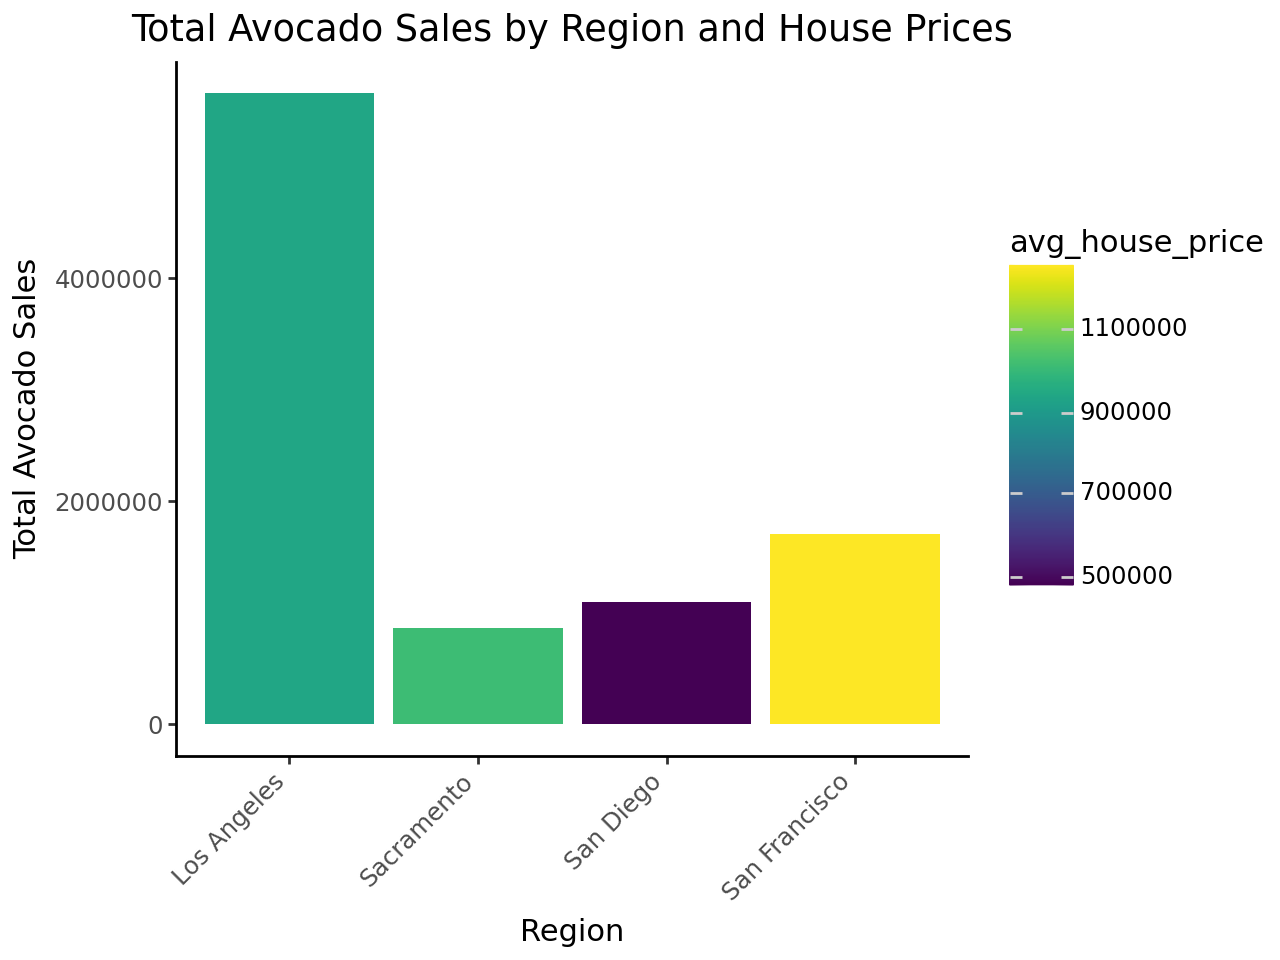

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


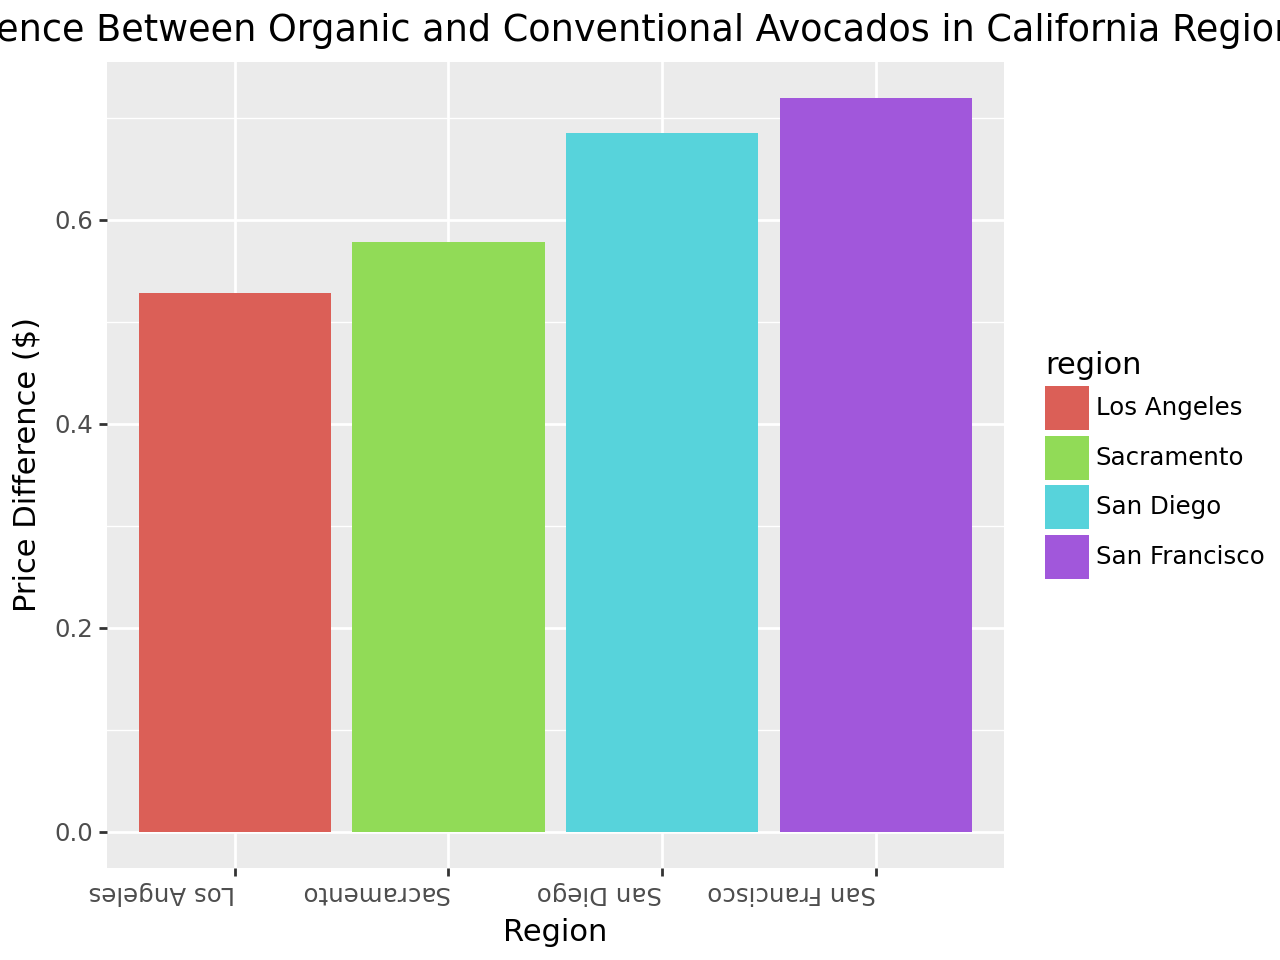

In [92]:
(
    ggplot(merged_data, aes(x='region', y='total_volume', fill='avg_house_price'))
    + geom_bar(stat='identity', position='dodge')
    + labs(title='Total Avocado Sales by Region and House Prices',
           x='Region',
           y='Total Avocado Sales')
    + theme_classic()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))  # Rotate labels for readability
)

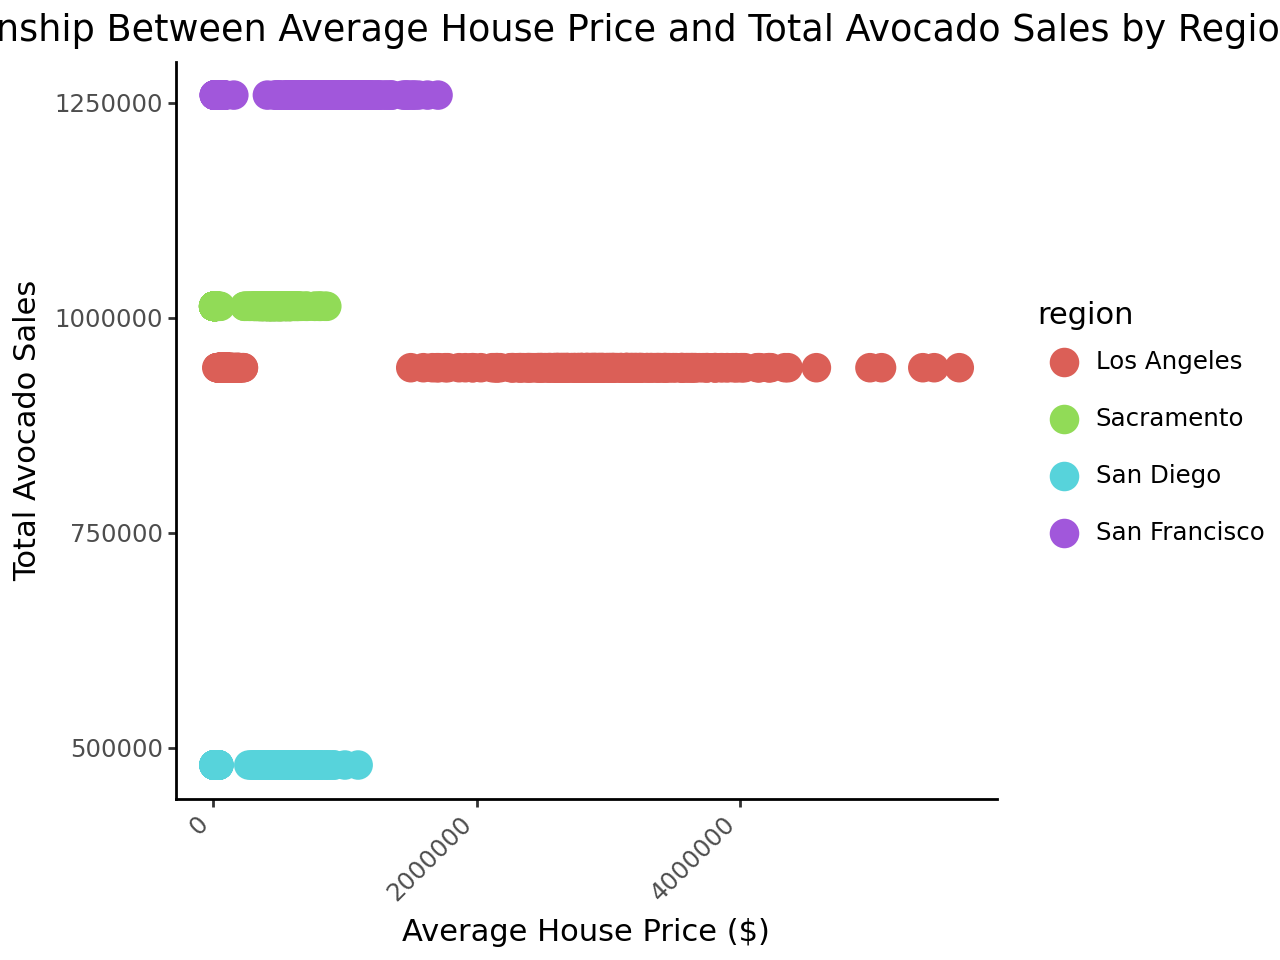

C:\Users\sjacob17\AppData\Local\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


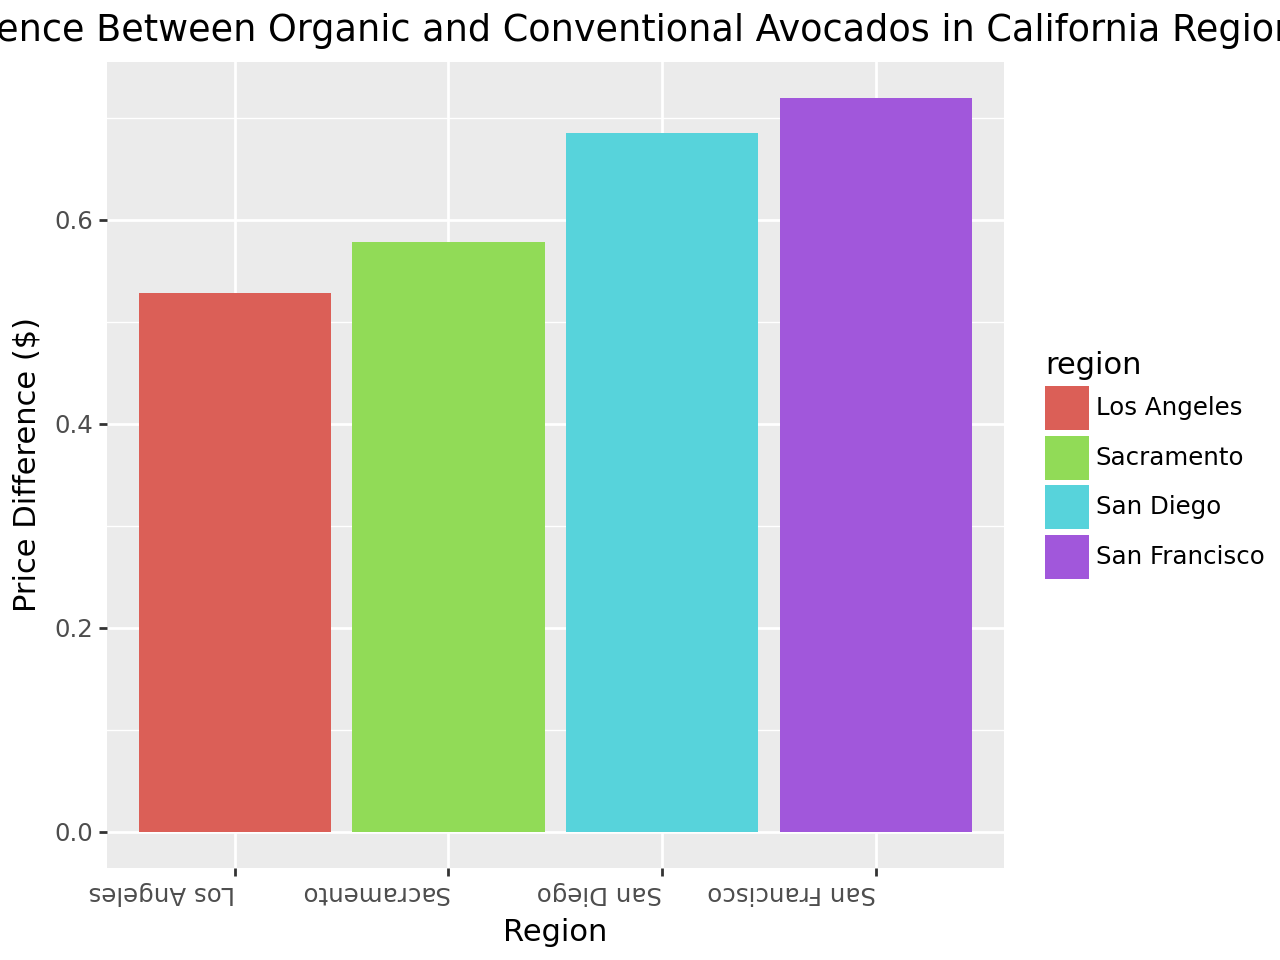

In [95]:
(
    ggplot(merged_data, aes(x='total_volume', y='avg_house_price', color='region'))
    + geom_point(size=5)  # Scatter plot points, size for emphasis
    
    + labs(title='Relationship Between Average House Price and Total Avocado Sales by Region',
           x='Average House Price ($)',
           y='Total Avocado Sales')
    + theme_classic()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))  # Rotate x-axis labels for readability
)